# Logo with black background  - Cut and paste

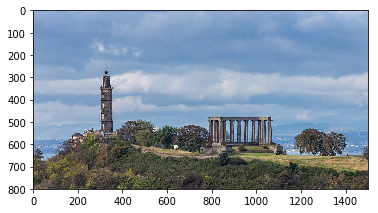

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('monument.jpg'))
plt.imshow(img, interpolation='nearest')

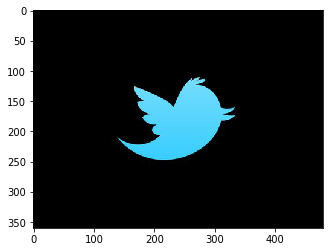

In [18]:
## Image to be pasted ###

logo = np.array(Image.open('twitter.jpg'))
plt.imshow(logo, interpolation='nearest')

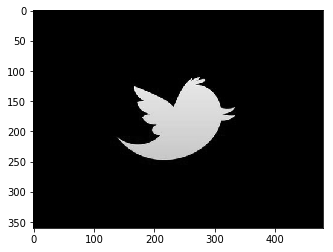

In [19]:
gray = np.zeros((logo.shape[0], logo.shape[1]))

for i in range(len(logo)):
    for j in range(len(logo[i])):
        gray[i][j] = 0.299*logo[i][j][0] + 0.587*logo[i][j][1] + 0.114*logo[i][j][2]

plt.imshow(gray, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

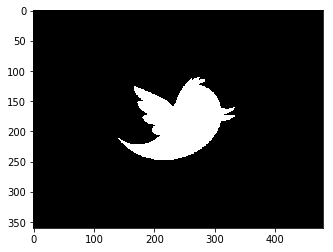

In [24]:
## Apply threshold ##

mask = np.zeros((logo.shape[0], logo.shape[1]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        mask[i][j] = 255 if gray[i][j]>50 else 0

plt.imshow(mask, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

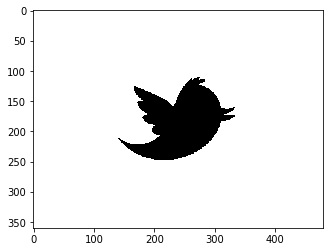

In [26]:
notImage = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        notImage[i][j] = ~int(mask[i][j])

plt.imshow(notImage, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

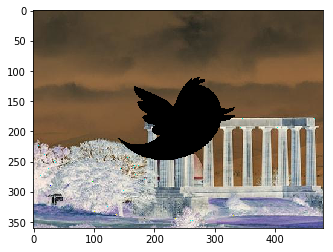

In [27]:
roi = img[300:300+logo.shape[0], 600:600+logo.shape[1]]

andImage = np.zeros((roi.shape[0], roi.shape[1], roi.shape[2]))

for i in range(roi.shape[0]):
    for j in range(roi.shape[1]):
        for k in range(roi.shape[2]):
            andImage[i][j][k] = int(roi[i][j][k]) & int(notImage[i][j])
            
plt.imshow(andImage, interpolation='nearest')
plt.show()

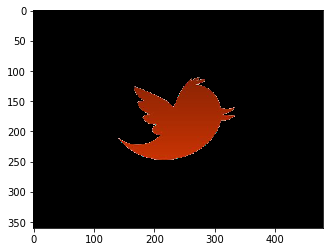

In [28]:
andLogo = np.zeros((roi.shape[0], roi.shape[1], roi.shape[2]))

for i in range(roi.shape[0]):
    for j in range(roi.shape[1]):
        for k in range(roi.shape[2]):
            andLogo[i][j][k] = int(logo[i][j][k]) & int(mask[i][j])
            
plt.imshow(andLogo, interpolation='nearest')
plt.show()

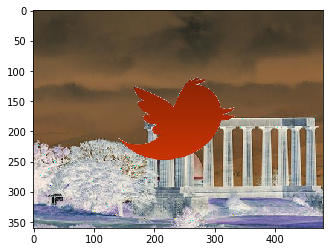

In [29]:
final = np.zeros((logo.shape[0], logo.shape[1], logo.shape[2]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        for k in range(logo.shape[2]):
            final[i][j][k] = int(andImage[i][j][k]) | int(andLogo[i][j][k])

plt.imshow(final)
plt.show()

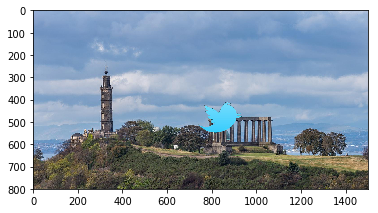

In [30]:
img[300:300+logo.shape[0], 600:600+logo.shape[1]] = final
plt.imshow(img, interpolation='nearest')